# Ejercicio propuesto
En el presente ejercicio se propone que se haga algo parecido a lo visto en clase, para esto en la carpeta de Datos encontrará unos archivos que debe primero arreglar para luego aplicarle un filtro.
La idea es la siguiente:
1. Abra los archivos haciendo uso de un metodo a fuerza bruta o haciendo uso de la libreria de pandas.
2. Organice los datos como se menció en la clase, para esto será util crear nuevas columnas que contengan la información requerida.
3. Exporte el archivo ya organizado en un nuevo archivo con la extención que usted desee. (csv, tsb, txt .. etc)
4. Abra este archivo creado desde un nuevo programa y prepare una gráfica en donde se muestre el comportamiento de esta señal. la grafica debe tener en el eje x las fechas y en el eje y el valor del precio en el momento indicado.
5. Haciendo uso de la libreria de scipy efectue un filtro a la señal de estos precios en donde los parametros a escoger deberan ser escogidos de forma que  "ajuste bien", para esto prepare varias gráficas y determine que valores del orden del filtro y de frecuencia funcionan mejor.
6. calcule la función de auto correlación para cada caso, grafique las funciones de autocorrelación y __DISCUTA__ cual cree que es mejor.
7. Por ultimo suba esto a su repositorio y ponga la dirección del repositorio como respuesta. Dentro del readme.md debe ir la discución del ejercicio.

In [1]:
import urllib
from io import StringIO
from io import BytesIO
import csv
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
import pandas as pd
import scipy.signal as signal

In [2]:
datos1 = pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2029-201910/master/Seccion_1/Fourier/Datos/transacciones2008.txt',sep=";")
datos2 = pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2029-201910/master/Seccion_1/Fourier/Datos/transacciones2009.txt',sep=";")
datos3 = pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2029-201910/master/Seccion_1/Fourier/Datos/transacciones2010.txt',sep=";")

In [3]:
datos1.columns = ['Fecha 0', 'Fecha 1', 'Valor 0', 'Valor 1']
datos2.columns = ['Fecha 0', 'Fecha 1', 'Valor 0', 'Valor 1']
datos3.columns = ['Fecha 0', 'Fecha 1', 'Valor 0', 'Valor 1']

In [4]:
datos1['Fecha 0'] = pd.to_datetime(datos1['Fecha 0'],format='%d/%m/%Y %H:%M:%S')
datos2['Fecha 0'] = pd.to_datetime(datos2['Fecha 0'],format='%d/%m/%Y %H:%M:%S')
datos3['Fecha 0'] = pd.to_datetime(datos3['Fecha 0'],format='%d/%m/%Y %H:%M:%S')
datos1['Fecha 1'] = pd.to_datetime(datos1['Fecha 1'],format='%d/%m/%Y %H:%M:%S') - np.datetime64("1899-12-30")
datos2['Fecha 1'] = pd.to_datetime(datos2['Fecha 1'],format='%d/%m/%Y %H:%M:%S') - np.datetime64("1899-12-30")
datos3['Fecha 1'] = pd.to_datetime(datos3['Fecha 1'],format='%d/%m/%Y %H:%M:%S') - np.datetime64("1899-12-30")
datos1

,Fecha 0,Fecha 1,Valor 0,Valor 1
0,2008-01-02,08:49:40,"499,00","500000,00"
1,2008-01-02,08:49:58,"499,00","100000,00"
2,2008-01-02,08:50:09,"499,00","250000,00"
3,2008-01-02,08:50:17,"499,40","200000,00"
4,2008-01-02,08:50:20,"499,49","500000,00"
5,2008-01-02,08:50:26,"499,50","500000,00"
6,2008-01-02,08:50:26,"499,00","200000,00"
7,2008-01-02,08:50:34,"499,49","500000,00"
8,2008-01-02,08:51:00,"499,80","200000,00"
9,2008-01-02,08:54:25,"499,50","250000,00"


In [5]:
datos1['Fecha 0'] = datos1['Fecha 0'] + datos1['Fecha 1']
datos2['Fecha 0'] = datos2['Fecha 0'] + datos2['Fecha 1']
datos3['Fecha 0'] = datos3['Fecha 0'] + datos3['Fecha 1']

In [6]:
datos1

,Fecha 0,Fecha 1,Valor 0,Valor 1
0,2008-01-02 08:49:40,08:49:40,"499,00","500000,00"
1,2008-01-02 08:49:58,08:49:58,"499,00","100000,00"
2,2008-01-02 08:50:09,08:50:09,"499,00","250000,00"
3,2008-01-02 08:50:17,08:50:17,"499,40","200000,00"
4,2008-01-02 08:50:20,08:50:20,"499,49","500000,00"
5,2008-01-02 08:50:26,08:50:26,"499,50","500000,00"
6,2008-01-02 08:50:26,08:50:26,"499,00","200000,00"
7,2008-01-02 08:50:34,08:50:34,"499,49","500000,00"
8,2008-01-02 08:51:00,08:51:00,"499,80","200000,00"
9,2008-01-02 08:54:25,08:54:25,"499,50","250000,00"


In [7]:
datos1['Fecha 0'] = pd.to_datetime(datos1['Fecha 0'],format='%d/%m/%Y %H:%M:%S')
datos2['Fecha 0'] = pd.to_datetime(datos2['Fecha 0'],format='%d/%m/%Y %H:%M:%S')
datos3['Fecha 0'] = pd.to_datetime(datos3['Fecha 0'],format='%d/%m/%Y %H:%M:%S')
datos = [datos1, datos2, datos3]
datos_totales = pd.concat(datos)
datos_totales.set_index(["Fecha 0"],inplace=True)


datos_totales

,Fecha 1,Valor 0,Valor 1
Fecha 0,,,
2008-01-02 08:49:40,08:49:40,"499,00","500000,00"
2008-01-02 08:49:58,08:49:58,"499,00","100000,00"
2008-01-02 08:50:09,08:50:09,"499,00","250000,00"
2008-01-02 08:50:17,08:50:17,"499,40","200000,00"
2008-01-02 08:50:20,08:50:20,"499,49","500000,00"
2008-01-02 08:50:26,08:50:26,"499,50","500000,00"
2008-01-02 08:50:26,08:50:26,"499,00","200000,00"
2008-01-02 08:50:34,08:50:34,"499,49","500000,00"
2008-01-02 08:51:00,08:51:00,"499,80","200000,00"


In [8]:
datos_totales = datos_totales.drop(columns = ['Fecha 1','Valor 1'])
datos_totales.to_csv('DatosFelipeGiraldoG.csv', index = False)
datos_totales = datos_totales.apply(lambda x: x.str.replace(',','.'))
datos_totales = pd.to_numeric(datos_totales['Valor 0'])
datos_totales

Fecha 0
2008-01-02 08:49:40    499.00
2008-01-02 08:49:58    499.00
2008-01-02 08:50:09    499.00
2008-01-02 08:50:17    499.40
2008-01-02 08:50:20    499.49
2008-01-02 08:50:26    499.50
2008-01-02 08:50:26    499.00
2008-01-02 08:50:34    499.49
2008-01-02 08:51:00    499.80
2008-01-02 08:54:25    499.50
2008-01-02 08:55:12    499.10
2008-01-02 08:55:40    499.30
2008-01-02 08:55:57    499.10
2008-01-02 08:56:10    498.90
2008-01-02 08:56:13    498.85
2008-01-02 08:57:02    498.75
2008-01-02 08:57:06    498.70
2008-01-02 08:57:14    498.00
2008-01-02 08:58:38    498.40
2008-01-02 09:00:14    498.45
2008-01-02 09:00:38    498.50
2008-01-02 09:01:08    498.40
2008-01-02 09:03:08    498.25
2008-01-02 09:03:09    498.25
2008-01-02 09:03:15    498.25
2008-01-02 09:03:15    498.25
2008-01-02 09:03:29    498.20
2008-01-02 09:03:29    498.25
2008-01-02 09:05:11    498.20
2008-01-02 09:05:12    498.20
                        ...  
2010-12-30 12:42:10    468.20
2010-12-30 12:45:21    468.50
20

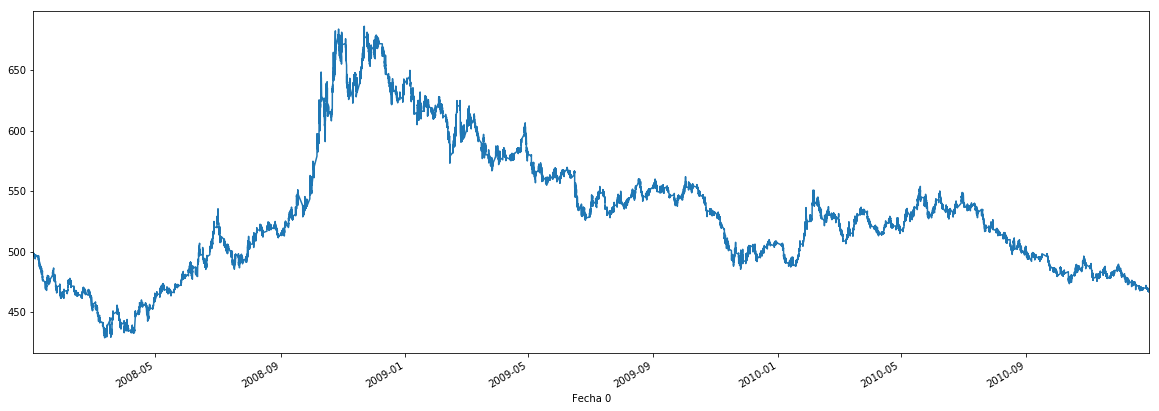

In [9]:
datos_totales.plot(figsize = (20,7))

In [10]:
valor = datos_totales.values
fechas = datos_totales.index.values

In [11]:
valor, fechas

(array([499. , 499. , 499. , ..., 468.6, 468.7, 468.8]),
 array(['2008-01-02T08:49:40.000000000', '2008-01-02T08:49:58.000000000',
        '2008-01-02T08:50:09.000000000', ...,
        '2010-12-30T13:52:10.000000000', '2010-12-30T13:52:42.000000000',
        '2010-12-30T14:01:14.000000000'], dtype='datetime64[ns]'))

In [13]:
N  = 4   # Orden del filtro
Wn = 0.0002# Corte de frecuancia
B, A = signal.butter(N, Wn)

In [14]:
valor_filtrados = signal.filtfilt(B,A, valor)

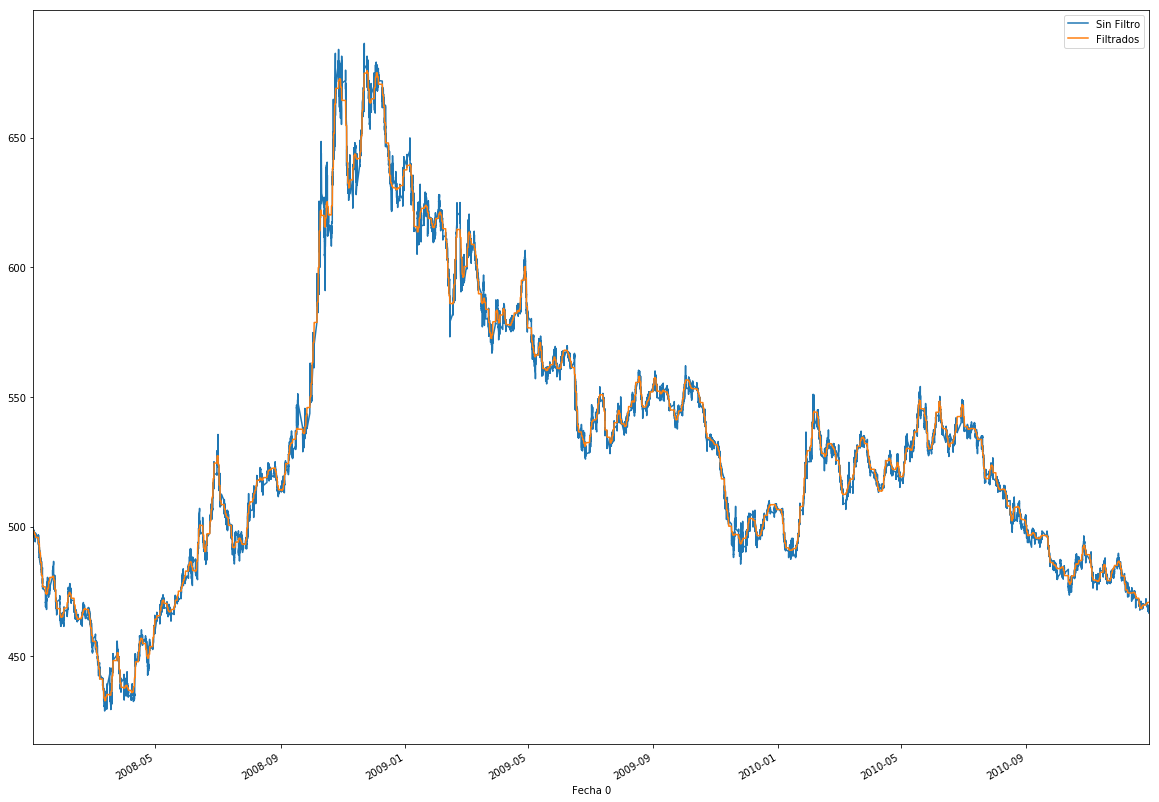

In [15]:
plt.figure(figsize=(20,15))
datos_totales.plot(label = 'Sin Filtro')
plt.plot(fechas,valor_filtrados, label = 'Filtrados')
plt.legend()

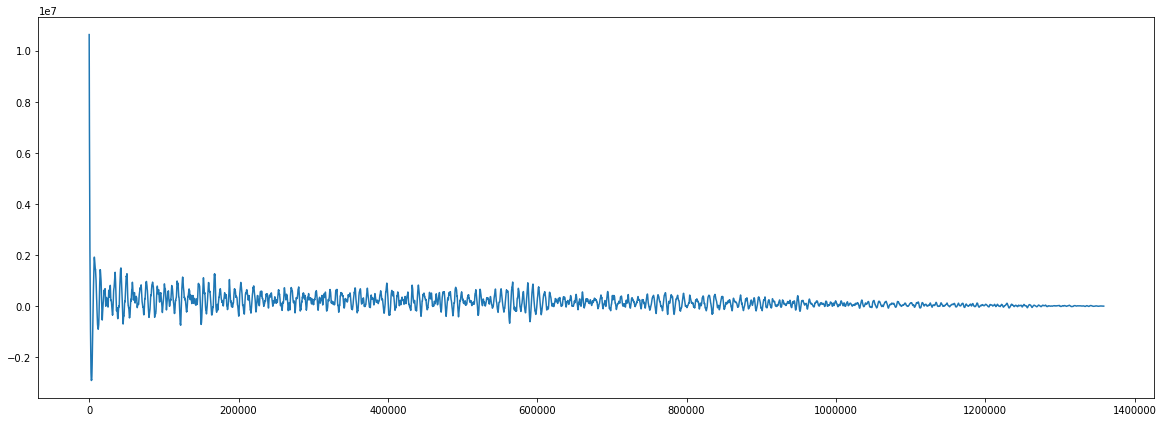

In [16]:
plt.figure(figsize=(20,7))
ruido = valor - valor_filtrados
corr = signal.correlate(ruido,ruido,mode="full")
plt.plot(corr[len(corr)//2:])
plt.show()

In [17]:
N  = 5   # Orden del filtro
Wn = 0.01# Corte de frecuancia
B, A = signal.butter(N, Wn)

In [18]:
valor_filtrados = signal.filtfilt(B,A, valor)

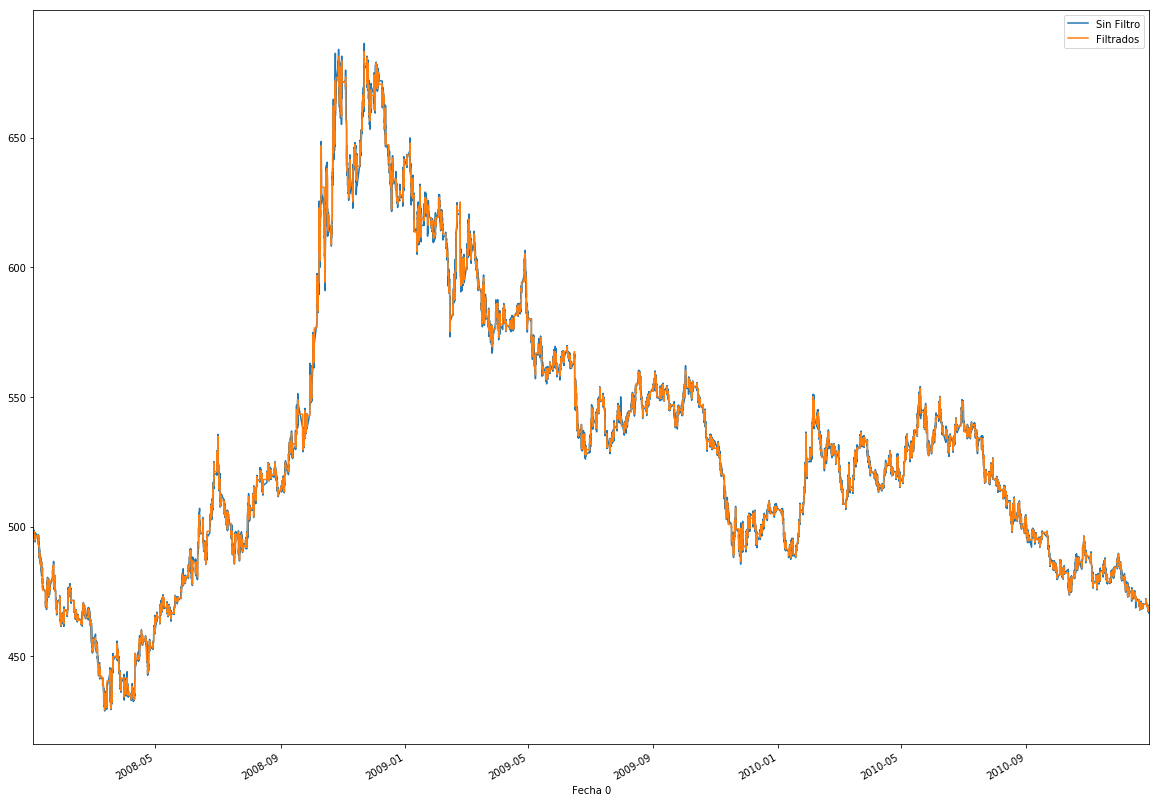

In [19]:
plt.figure(figsize=(20,15))
datos_totales.plot(label = 'Sin Filtro')
plt.plot(fechas,valor_filtrados, label = 'Filtrados')
plt.legend()

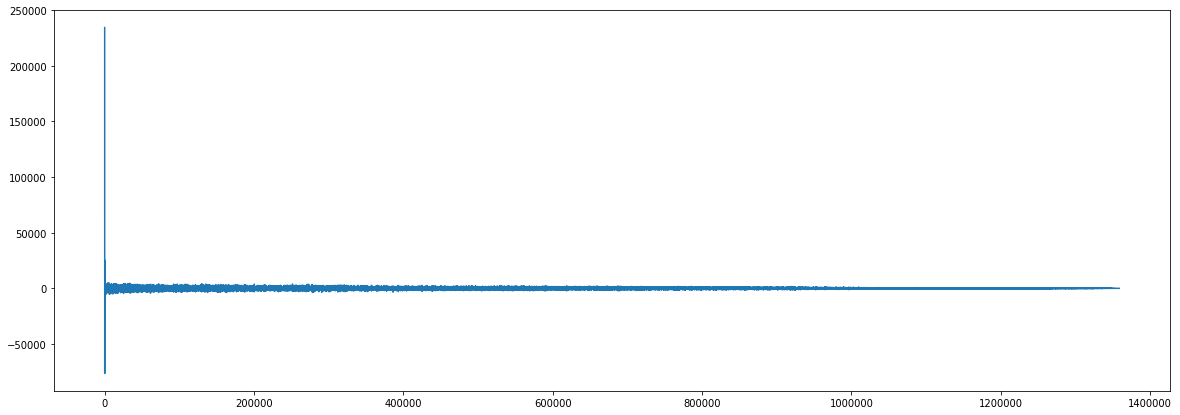

In [20]:
plt.figure(figsize=(20,7))
ruido = valor - valor_filtrados
corr = signal.correlate(ruido,ruido,mode="full")
plt.plot(corr[len(corr)//2:])
plt.show()

In [21]:
N  = 2   # Orden del filtro
Wn = 0.0002# Corte de frecuancia
B, A = signal.butter(N, Wn)

In [22]:
valor_filtrados = signal.filtfilt(B,A, valor)

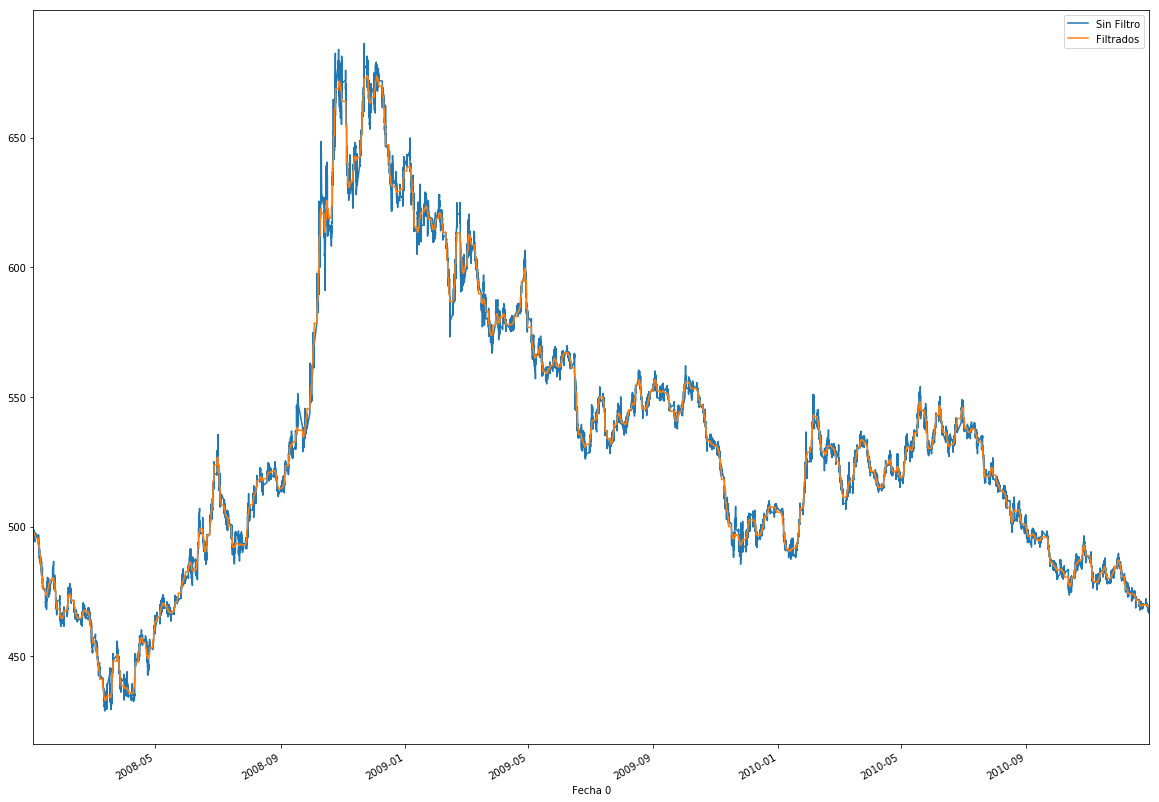

In [23]:
plt.figure(figsize=(20,15))
datos_totales.plot(label = 'Sin Filtro')
plt.plot(fechas,valor_filtrados, label = 'Filtrados')
plt.legend()

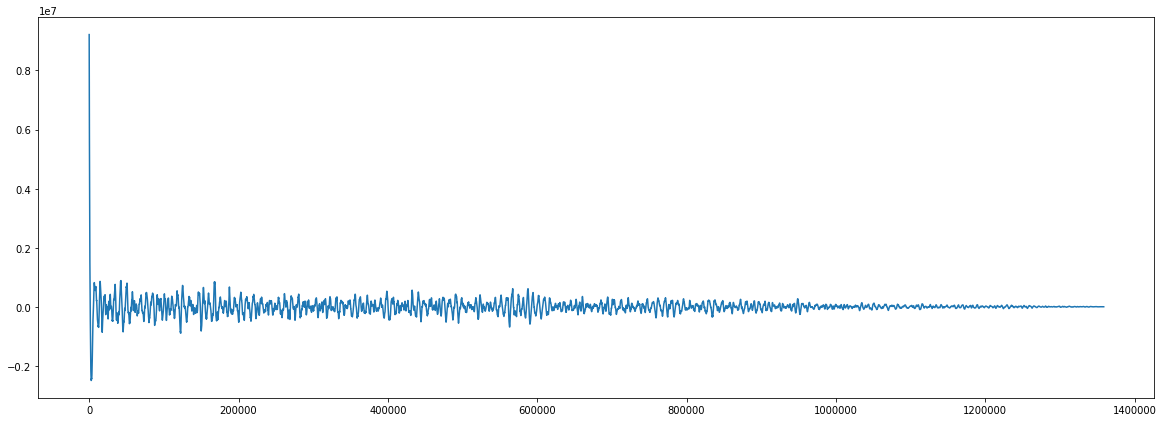

In [24]:
plt.figure(figsize=(20,7))
ruido = valor - valor_filtrados
corr = signal.correlate(ruido,ruido,mode="full")
plt.plot(corr[len(corr)//2:])
plt.show()

In [25]:
N  = 4   # Orden del filtro
Wn = 0.01# Corte de frecuancia
B, A = signal.butter(N, Wn)

In [26]:
valor_filtrados = signal.filtfilt(B,A, valor)

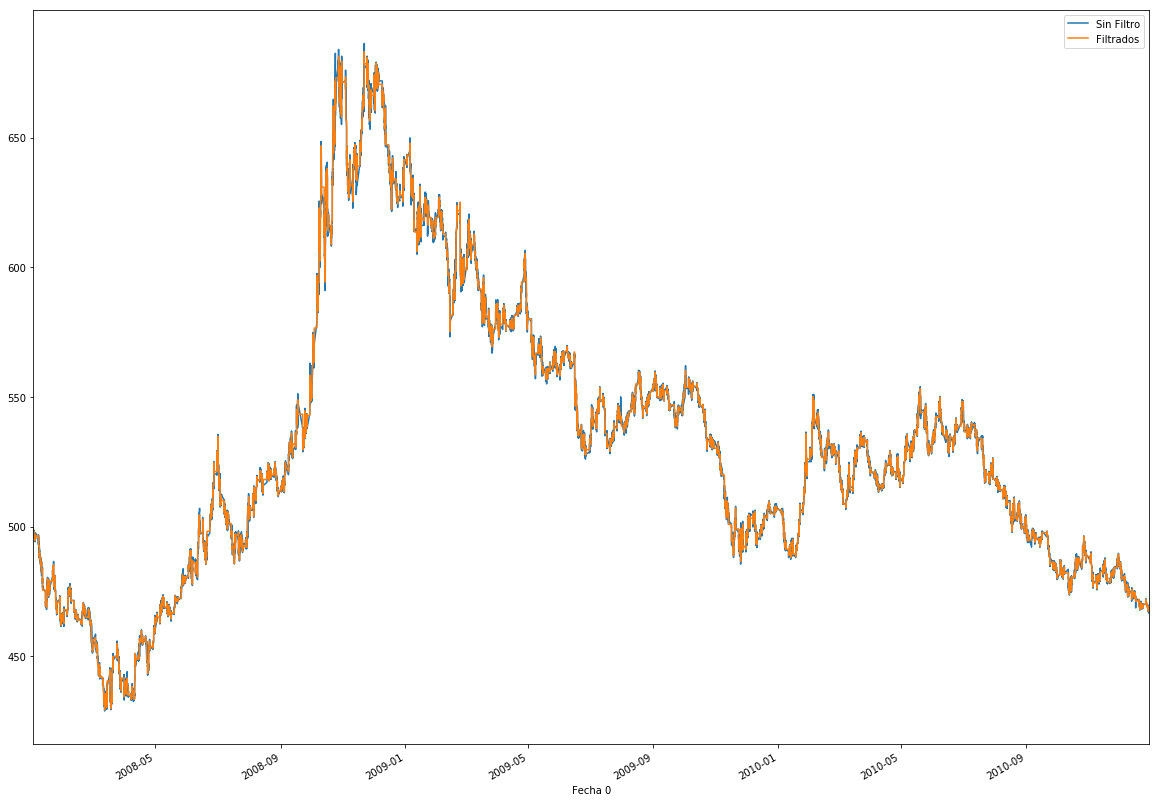

In [27]:
plt.figure(figsize=(20,15))
datos_totales.plot(label = 'Sin Filtro')
plt.plot(fechas,valor_filtrados, label = 'Filtrados')
plt.legend()

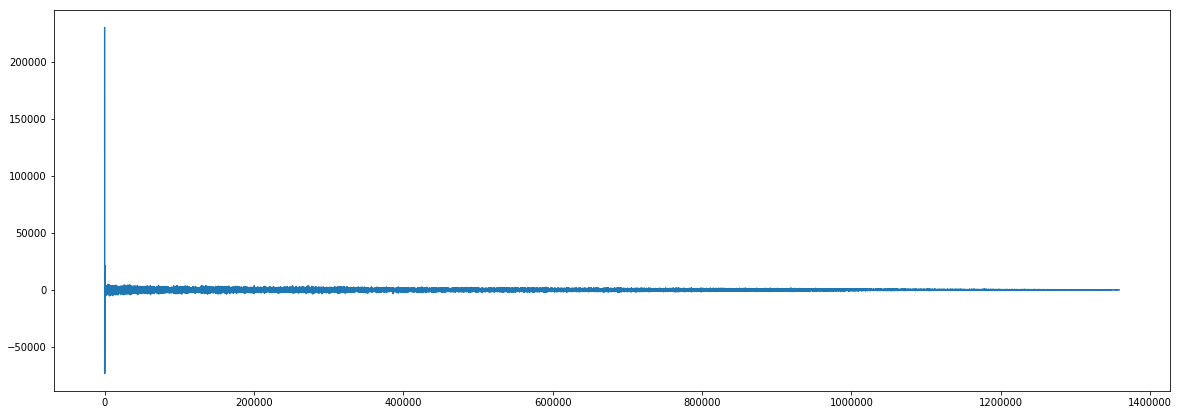

In [28]:
plt.figure(figsize=(20,7))
ruido = valor - valor_filtrados
corr = signal.correlate(ruido,ruido,mode="full")
plt.plot(corr[len(corr)//2:])
plt.show()